(algebra)=
# Introducción al álgebra lineal para computación cuántica.



El álgebra lineal es el lenguaje base de la computación cuántica. Por lo tanto, es crucial desarrollar una buena comprensión de los conceptos matemáticos básicos sobre los que se construye el álgebra lineal, para llegar a muchas de las sorprendentes e interesantes construcciones que se ven en la computación cuántica. El objetivo de esta sección es crear una base de conocimientos introductorios de álgebra lineal, sobre la que el lector pueda construir durante su estudio de la computación cuántica.


### Vectores y espacios vectoriales.

Comenzaremos nuestra investigación en álgebra lineal introductoria discutiendo primero una de los elementos matemáticos más importantes en computación cuántica: el vector.

Formalmente, un **vector** $|v\rangle$ se define como los elementos de un conjunto conocido como espacio vectorial. Una definición más intuitiva y geométrica es que un vector "es una cantidad matemática con dirección y magnitud". Por ejemplo, consideremos un vector con componentes $x$ e $y$ de la forma $\begin{pmatrix} 3 \\ 5 \end{pmatrix}$.



Este vector puede visualizarse como una flecha que apunta en la dirección de $3$ unidades a lo largo del eje $x$ y $5$ unidades a lo largo del eje $y$:



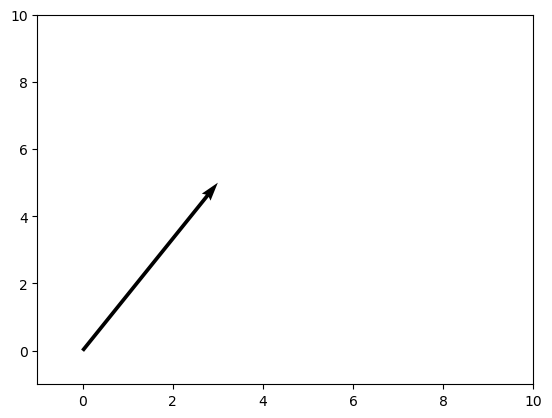

In [5]:
from matplotlib import pyplot as plt

plt.figure()
ax = plt.gca()
ax.quiver([3], [5], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

Tenga en cuenta que la "cola" del vector no tiene por qué estar situada en el origen; sólo necesita apuntar en la dirección correcta.

En computación cuántica, a menudo tratamos con vectores de estado, que son simplemente vectores que apuntan a un punto específico en el espacio que corresponde a un estado cuántico concreto. Esto puede visualizarse utilizando una esfera de Bloch. Por ejemplo, un vector que represente el estado de un sistema cuántico podría parecerse a esta flecha, encerrada dentro de la esfera de Bloch, que es el llamado *"espacio de estados"* de todos los puntos posibles a los que pueden "apuntar" nuestros vectores de estado:




In [6]:
# Cargamos la librerias
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector

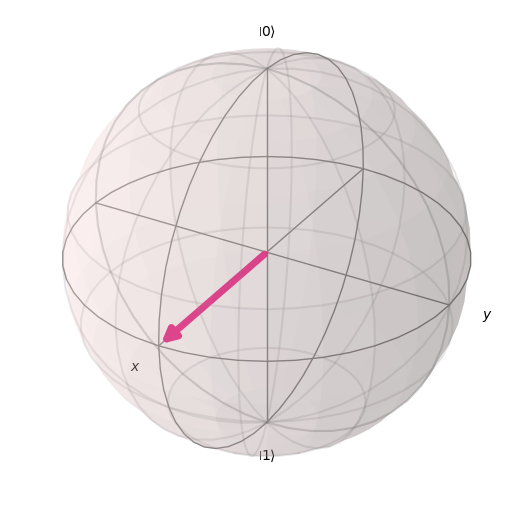

In [7]:
# Dibujamos con coordendas cartesianas un punto en la esfera de Boch
plot_bloch_vector([1, 0, 0])

Este estado concreto corresponde a una superposición de estados entre $|0\rangle$ y $|1\rangle$ (la flecha está a medio camino entre $|0\rangle$ en la parte superior y $|1\rangle$ en la parte inferior de la esfera). Nuestros vectores pueden girar en cualquier punto de la superficie de la esfera, y cada uno de estos puntos representa un estado cuántico diferente.

Volvamos a nuestra definición más formal de vector, según la cual un vector es un elemento de un espacio vectorial. Ahora debemos definir un espacio vectorial. Un **espacio vectorial** $V$ sobre un **campo** $F$ es un conjunto de objetos (vectores), donde se cumplen dos condiciones. 

En primer lugar, la **suma vectorial** de dos vectores $|a\rangle, \ |b\rangle \ \in \ V$ genera un tercer vector $|a\rangle \ + \ |b\rangle \ = \ |c\rangle$ también contenido en $V$.

La segunda condición es que la **multiplicación escalar** entre algún $|a\rangle \ \in \ V$ y algún $n \ \in \ F$, denotado por $n|a\rangle$, también está contenida en $V$.


Vamos a aclarar la definición anterior con un ejemplo básico. Demostremos que el conjunto $\mathbb{R}^2$ sobre el campo $\mathbb{R}$ es un espacio vectorial. Afirmamos que


$$\begin{pmatrix} x_1 \\ y_1 \end{pmatrix} \ + \ \begin{pmatrix} x_2 \\ y_2 \end{pmatrix} \ = \ \begin{pmatrix} x_1 \ + \ x_2 \\ y_1 \ + \ y_2 \end{pmatrix}$$


está contenido en $\mathbb{R}^2$. Esto es evidentemente en este caso, ya que la suma de dos números reales es un número real, haciendo que ambos componentes del vector recién formado sean números reales; por lo tanto, el vector está contenido en $\mathbb{R}^2$ por definición. También afirmamos que:


$$n |v\rangle \ = \ \begin{pmatrix} nx \\ ny \end{pmatrix} \ \in \ V \ \ \ \ \forall n \ \in \ \mathbb{R}$$

Esto también es cierto, ya que el producto de un número real por un número real es un número real, lo que hace que todo el nuevo vector sea real y, por tanto, demuestra esta afirmación.


### Matrices y operaciones con matrices.

Centrémonos en otro concepto fundamental: una **matriz**. Las matrices son objetos matemáticos que transforman vectores en otros vectores:


$$|v\rangle \ \rightarrow \ |v'\rangle \ = \ M |v\rangle$$

Por lo general, las matrices se escriben como "arrays" de números, con un aspecto similar al siguiente:


$$M \ = \ \begin{pmatrix} 1 & -2 & 3 \\ 1 & 5i & 0 \\ 1 \ + \ i & 7 & -4 \end{pmatrix}$$

Podemos "aplicar" una matriz a un vector realizando una multiplicación matricial. En general, la multiplicación matricial entre dos matrices consiste en tomar la primera fila de la primera matriz y multiplicar cada elemento por su "pareja" en la primera columna de la segunda matriz (el primer número de la fila se multiplica por el primer número de la columna, el segundo número de la fila y el segundo número de la columna, etc.). La suma de estos nuevos números se convierte en el primer elemento de la primera fila de la nueva matriz. Para rellenar el resto de la primera fila, repetimos este proceso para la segunda, tercera, etc. columnas de la segunda matriz. A continuación, tomamos la segunda fila de la primera matriz y repetimos el proceso para cada columna de la segunda matriz, para producir la segunda fila. Realizamos este proceso hasta que hayamos utilizado todas las filas de la primera matriz. La matriz resultante es nuestra nueva matriz. He aquí un ejemplo:



$$\begin{pmatrix} 2 & 0 \\ 5 & -1 \end{pmatrix} \begin{pmatrix} -3 & 1 \\ 2 & 1 \end{pmatrix} \ = \ \begin{pmatrix} (2)(-3) + (0)(2) & (2)(1) \ + \ (0)(1) \\ (5)(-3) + (-1)(2) & (5)(1) \ + \ (-1)(1) \end{pmatrix} \ = \ \begin{pmatrix} -6 & 2 \\ -17 & 4 \end{pmatrix}$$


Para realizar un cálculo cuántico, tenemos un vector de estado cuántico que manipulamos aplicando una matriz a ese vector. Un vector es simplemente una matriz con una columna. Para aplicar una matriz a un vector, por tanto, seguimos el mismo procedimiento de multiplicación de matrices descrito anteriormente. Manipulamos qubits en nuestro ordenador cuántico aplicando secuencias de **puertas cuánticas**. Cada puerta cuántica puede expresarse como una matriz que puede aplicarse a vectores de estado, cambiando así el estado. Por ejemplo, una puerta cuántica comúnmente vista es la puerta Pauli-X, que se representa mediante la siguiente matriz:



$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

Esta puerta actúa de forma similar a la puerta lógica clásica NOT. Mapea el estado base computacional $|0\rangle$ a $|1\rangle$ y $|1\rangle$ a $|0\rangle$ ("invierte" el estado). Escribimos los dos estados base como vectores columna:



$$|0\rangle \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ \ \ \ \ \ \ |1\rangle \ = \ \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

Cuando aplicamos esta matriz a cada uno de los vectores:



$$\sigma_x |0\rangle \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ = \ \begin{pmatrix} (0)(1) \ + \ (1)(0) \\ (1)(1) \ + \ (0)(0) \end{pmatrix} \ = \ \begin{pmatrix} 0 \\ 1 \end{pmatrix} \ = \ |1\rangle$$





$$\sigma_x |1\rangle \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} \ = \ \begin{pmatrix} (0)(0) \ + \ (1)(1) \\ (1)(0) \ + \ (0)(1) \end{pmatrix} \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ = \ |0\rangle$$

La matriz actúa sobre los vectores de estado como era de esperar.

Dentro de la computación cuántica, a menudo nos encontramos con dos tipos importantes de matrices: **Matrices hermitianas** y **matrices unitarias**. La primera es más importante en el estudio de la mecánica cuántica, pero sigue siendo necesario discutirla en un estudio de computación cuántica. La segunda tiene una importancia sin parangón tanto en la mecánica cuántica como en la computación cuántica. Si sólo te llevas un concepto de esta sección sobre álgebra lineal, debería ser el concepto de matriz unitaria.

```{index} Hermitian matrix
```
Una *matriz hermitiana* es simplemente una matriz que es igual a su **transpuesto conjugado** (denotado con un símbolo $\dagger$).  Esto significa que si se invierte el signo de las componentes imaginarias de una matriz hermitiana y, a continuación, se reflejan sus entradas a lo largo de su diagonal principal (desde las esquinas superior izquierda a inferior derecha), se obtiene una matriz igual. Por ejemplo, la matriz Pauli-Y, utilizada habitualmente en computación cuántica, es hermitiana:



$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \Rightarrow \ \sigma_y^{\dagger} \ = \ \begin{pmatrix} 0 & -(i) \\ -(-i) & 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ = \ \sigma_y$$

Observa cómo hemos cambiado los lugares de la $i$ y de la $-i$ (como reflejamos a través de la diagonal principal, los ceros permanecen inalterados), y luego hemos invertido el signo. 

```{index} unitary matriz
```
Una matriz unitaria es muy similar. En concreto, es una matriz tal que el **inverso de la matriz** es igual al transpuesto conjugado de la matriz original.

La inversa de alguna matriz $A$, denotada como $A^{-1}$, es una matriz tal que:


$$A^{-1} A \ = \ A A^{-1} \ = \ \mathbb{I}$$

donde $\mathbb{I}$ es la matriz identidad. La matriz identidad tiene $1$s a lo largo de la diagonal principal (de arriba a la izquierda hasta abajo a la derecha), y $0$s en todos los demás lugares. Se llama la matriz identidad porque actúa trivialmente sobre cualquier otra matriz (no tiene ningún efecto). Puedes demostrarlo por ti mismo multiplicando una matriz identidad por cualquier otra matriz.  

Cuando las matrices son mayores que 2 veces 2, el cálculo de la inversa se complica tanto que suele dejarse en manos de los ordenadores. Para una matriz de $2 \ \times \ 2$, la inversa se define como:

 
$$A \ = \ \begin{pmatrix} a & b \\ c & d \end{pmatrix} \ \Rightarrow \ A^{-1} \ = \ \frac{1}{\text{det} \ A} \begin{pmatrix} d & -b \\ -c & a \end{pmatrix},$$
<br>

donde $\text{det} \ A$ es el **determinante** de la matriz. En el caso de $2 \ \times \ 2$, $\text{det} \ A \ = \ ad \ - \ bc$.

El cálculo de matrices inversas rara vez es importante en computación cuántica. Como la mayoría de las matrices con las que nos encontramos son unitarias, podemos suponer que la inversa se obtiene simplemente tomando la transposición conjugada.

Veamos un ejemplo básico. La matriz Pauli-Y, además de ser hermitiana, es unitaria (es igual a su transpuesta conjugada, que a su vez es igual a su inversa; por tanto, ¡la matriz Pauli-Y es su propia inversa!) Podemos comprobar que esta matriz es unitaria:




$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \ \ \ \ \sigma_y^{\dagger} \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \Rightarrow \ \sigma_y^{\dagger} \sigma_y \ = \ \begin{pmatrix} (0)(0) + (-i)(i) & (0)(-i) \ + \ (-i)(0) \\ (i)(0) \ + \ (0)(i) &  (i)(-i) \ + \ (0)(0) \end{pmatrix} \ = \ \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \ = \ \mathbb{I}$$

La razón por la que las matrices unitarias son importantes se hará más evidente en la sección sobre los espacios de Hilbert, y más aún en el subtema de mecánica cuántica de este libro de texto. La idea básica es que la evolución de un estado cuántico mediante la aplicación de una matriz unitaria "preserva" la norma (magnitud) del estado cuántico.


### Spanning Conjuntos, Dependencia lineal y bases.

Ahora estamos en condiciones de discutir la construcción de espacios vectoriales. Consideremos un espacio vectorial $V$. Decimos que un conjunto de vectores $S$ abarca un subespacio $V_S \ \subset \ V$ (subconjunto cerrado bajo operaciones de espacio vectorial) del espacio vectorial, si podemos escribir cualquier vector en el subespacio como una **combinación lineal** de vectores contenidos dentro del conjunto que abarca. 

Una combinación lineal de algunos vectores de colección $|v_1\\rangle, \ ..., \ |v_n\rangle$ en algún espacio vectorial sobre un campo $F$ se define como una suma arbitraria de estos vectores (que por supuesto será otro vector que llamaremos $|v\rangle$):


$$|v\rangle \ = \ f_1 |v_1\rangle \ + \ f_2 |v_2\rangle \ + \ ... \ + \ f_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ f_i |v_i\rangle$$

donde cada $f_i$ es algún elemento de $F$. Si tenemos un conjunto de vectores que abarca un espacio, estamos diciendo que **cualquier otro vector** en el espacio vectorial puede escribirse como una combinación lineal de estos vectores.

Un conjunto de vectores $|v_1\rangle, \ ..., \ |v_n\rangle$ se dice que es **linealmente dependiente** si existen coeficientes correspondientes para cada vector, $b_i \ en \ F$, tales que:


$$b_1 |v_1\rangle \ + \ b_2 |v_2\rangle \ + \ ... \ + \ b_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ 0,$$

donde al menos uno de los coeficientes $b_i$ es distinto de cero. Esto equivale a la afirmación más intuitiva de que "el conjunto de vectores puede expresarse como combinaciones lineales entre sí". Por ejemplo, tengamos el conjunto $\{|v_1\rangle, \ ..., \|v_n\rangle \}$ junto con los coeficientes correspondientes $\{b_1, \ ..., \ b_n \}$, tal que la combinación lineal es igual a $0$. Como hay al menos un vector con coeficiente distinto de cero, elegimos un término en la combinación lineal $b_a |v_a\\rangle$:





$$\displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ b_a |v_a\rangle \ + \ \displaystyle\sum_{i, \ i \ \neq \ a} \ b_i |v_i\rangle \ = \ 0 \ \Rightarrow \ |v_a\rangle \ = \ - \displaystyle\sum_{i, \ i \ \neq \ a} \ \frac{b_i}{b_a} |v_i\rangle \ = \ \displaystyle\sum_{i, \ i \ \neq \ a} \ c_i |v_i\rangle$$

En el caso de que $b_a$ sea el único coeficiente distinto de cero, es necesariamente cierto que $|v_a\rangle$ es el vector nulo, lo que hace automáticamente que el conjunto sea linealmente dependiente. Si no es así, $|v_a\rangle$ se ha escrito como una combinación lineal de vectores distintos de cero, como se ha demostrado anteriormente. Para demostrar lo contrario, suponemos que existe algún vector $|v_a\rangle$ en el subespacio $|v_1\rangle, ..., |v_n\rangle$ que puede escribirse como combinación lineal de otros vectores del subespacio. Esto significa que:


$$|v_a\rangle \ = \ \displaystyle\sum_{s} b_s |v_s\rangle$$

donde $s$ es un índice que recorre un subconjunto del subespacio. Se deduce que:




$$|v_a\rangle \ - \ \displaystyle\sum_{s} b_s |v_s\rangle \ = \ |v_a\rangle \ - \ (b_1|v_{s_1}\rangle \ + \ ... \ + \ b_r|v_{s_r}\rangle) \ = \ 0$$

Para todos los vectores del subespacio que no están incluidos en el subconjunto indexado por $s$, establecemos sus coeficientes, indexados por $q$, iguales a $0$. Así,



$$|v_a\rangle \ - \ (b_1|v_{s_1}\rangle \ + \ ... \ + \ b_r|v_{s_r}\rangle) \ + \ (0)(|v_{q_1}\rangle \ + \ ... \ + \ |v_{q_t}\rangle) \ = \ 0$$

que es una combinación lineal de todos los elementos del subespacio $|v_1\\rangle, \ ..., |v_n\rangle$. Esto es igual a $0$, completando así la prueba de que las dos definiciones de dependencia lineal se implican mutuamente.

Consideremos ahora un ejemplo básico. Consideremos el conjunto de dos vectores en $\\mathbb{R}^2$, formado por $||a\rangle \ = \ \begin{pmatrix} 1 \ 0 \end{pmatrix}$ y $|b\rangle \ = \ \begin{pmatrix} 2 \ 0 \end{pmatrix}$. Si elegimos que el campo sobre nuestro espacio vectorial sea $\mathbb{R}$, entonces podemos crear una combinación lineal de estos vectores que equivalga a $0$. Por ejemplo:



$$2|a\rangle \ - \ |b\rangle \ = \ 0$$

Se dice que un conjunto de vectores es **linealmente independiente** si no hay ningún vector en el conjunto que pueda expresarse como combinación lineal de todos los demás.

La noción de **base** es simplemente un **conjunto lineal independiente**. En este sentido, la base de un espacio vectorial es el mínimo conjunto posible que abarca todo el espacio. Llamamos **dimensión** del espacio vectorial al tamaño del conjunto base.

Las bases y los conjuntos de extensión son importantes porque nos permiten "reducir" los espacios vectoriales y expresarlos en términos de unos pocos vectores. Podemos llegar a ciertas conclusiones sobre nuestro conjunto de bases que podemos generalizar a todo el espacio vectorial, simplemente porque sabemos que cada vector del espacio no es más que una combinación lineal de los vectores de las bases. 

En computación cuántica, una de las bases que encontramos a menudo es $|0\rangle, ||1\rangle$. Podemos escribir cualquier otro estado qubit como una combinación lineal de estos vectores base. Por ejemplo, la combinación lineal



$$\frac{|0\rangle \ + \ |1\rangle}{\sqrt{2}}$$

representa una superposición entre el estado base $|0\rangle$ y $|1\rangle$, con igual probabilidad de medir el estado para estar en cualquiera de los estados del vector base (esto es intuitivo, ya que el "peso" o la "cantidad de cada vector base" en la combinación lineal es igual, siendo ambos escalados por $1/\sqrt{2}$).


###  Espacios de Hilbert , Ortonormalidad, y producto interno.

Los espacios de Hilbert son una de las construcciones matemáticas más importantes de la mecánica cuántica y la computación cuántica. Un espacio de Hilbert puede considerarse el espacio de estados en el que "viven" todos los vectores de estados cuánticos. La principal diferencia entre un espacio de Hilbert y cualquier espacio vectorial aleatorio es que un espacio de Hilbert está equipado con un **producto interno**, que es una operación que puede realizarse entre dos vectores, devolviendo un escalar. 

En el contexto de la mecánica cuántica y la computación cuántica, el producto interior entre dos vectores de estado devuelve una cantidad escalar que *representa en qué medida el primer vector se encuentra a lo largo del segundo vector*. A partir de ella, se pueden calcular las probabilidades de medición en diferentes estados cuánticos (entre otras cosas) (esto se trata más a fondo en el subtema de mecánica cuántica). 

Para dos vectores $|a\rangle$ y $|b\rangle$ en un espacio de Hilbert, denotamos el producto interior como $\langle a | b \rangle$, donde $\langle a |$ es igual a la transposición conjugada de $|a\rangle$, denotada $|a\rangle^{\dagger}$. Por lo tanto, el producto interior entre dos vectores del espacio de Hilbert se ve algo así como:


$$\langle a | b \rangle \ = \ \begin{pmatrix} a_1^{*} & a_2^{*} & ... & a_n^{*} \end{pmatrix} \begin{pmatrix} b_1 \\ b_2 \\ . \\ . \\ . \\ b_n \end{pmatrix} \ = \ a_1^{*} b_1 \ + \ a_2^{*} b_2 \ + \ ... \ + \ a_n^{*} b_n$$


donde $*$ denota el complejo conjugado de un vector.

Una de las condiciones más importantes para que un espacio de Hilbert represente un sistema cuántico es que el producto interior de un vector consigo mismo sea igual a uno: $\langle \psi | \psi \rangle \ = \ 1$. 

Esta es la llamada condición de normalización, que establece que la longitud del vector elevada al cuadrado (cada componente del vector se eleva al cuadrado y se suma, por definición del producto interior) debe ser igual a uno. El significado físico de esto es que la longitud de un vector en una dirección particular es representativa de la "amplitud de probabilidad" del sistema cuántico con respecto a la medición en ese estado particular. Obviamente, la probabilidad de que el sistema cuántico se mida en el estado en que se encuentra debe ser $1$ (después de todo, la suma de las probabilidades de encontrar el sistema cuántico en cualquier estado particular debe ser igual a $1$).

Representemos a continuación la esfera de Bloch


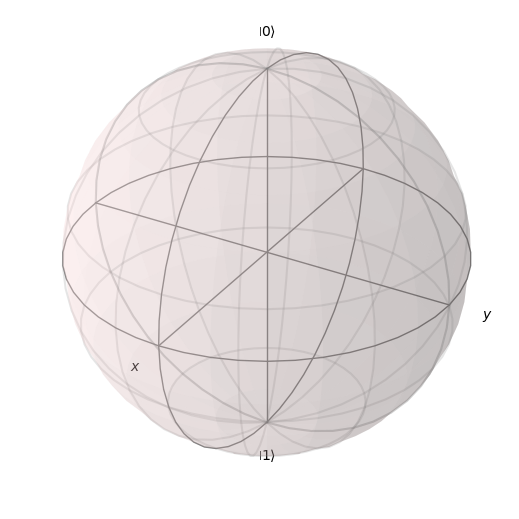

In [8]:
plot_bloch_vector([0, 0, 0])

La superficie de esta esfera, junto con el producto interno entre los vectores de estado de los qubits, es un espacio de Hilbert válido. Además, la condición de normalización se cumple, ya que el radio de la esfera de Bloch es $1$, y por tanto la longitud al cuadrado de cada vector también debe ser igual a $1$.

Una nota final sobre los espacios de Hilbert y el producto interior es su relación con las **matrices unitarias**. Las matrices unitarias son importantes en la computación cuántica porque **preservan el producto interior**, lo que significa que no importa cómo se transforme un vector bajo una secuencia de matrices unitarias, la condición de normalización sigue siendo cierta. Esto se puede demostrar de la siguiente manera:





$$\langle \psi | \psi \rangle \ = \ 1 \ \Rightarrow \ |\psi\rangle \ \rightarrow \ U |\psi\rangle \ = \ |\psi'\rangle \ \Rightarrow \ \langle \psi' | \psi' \rangle \ = \ (U |\psi\rangle)^{\dagger} U|\psi\rangle \ = \ \langle \psi | U^{\dagger} U |\psi\rangle \ = \ \langle \psi | \psi \rangle \ = \ 1$$

Esto significa que la evolución unitaria envía estados cuánticos a otros estados cuánticos válidos. Para un espacio de Hilbert de un solo qubit, representado por la esfera de Bloch, las transformaciones unitarias corresponden a rotaciones de los vectores de estado a distintos puntos de la esfera, sin cambiar en absoluto la longitud del vector de estado.



### Outer Producto y producto tensorial.

Los productos internos no son la única forma de multiplicar vectores. De vez en cuando, vamos a cambiar el orden del bra y ket con el fin de tomar el **producto exterior,** cuyo resultado es una matriz, en lugar de un solo número. Para dos vectores $|a\rangle$ y $|b\rangle$ en un espacio de Hilbert, denotamos el producto exterior como $| a \rangle$$\langle b |$, donde $\langle b |$ es igual a la transposición conjugada de $|b\rangle$, como antes. Esto nos da:



$$| a \rangle \langle b | \ = \ \begin{pmatrix} a_1 \\ a_2 \\ \vdots \\ a_n \end{pmatrix} \begin{pmatrix} b_1^{*} & b_2^{*} & \cdots & b_n^{*} \end{pmatrix} \ = \begin{pmatrix} a_1 b_1^{*} & a_1 b_2^{*} & \cdots & a_1 b_n^{*} \\ a_2 b_1^{*} & a_2 b_2^{*} &  & \vdots \\ \vdots &  & \ddots & \vdots \\ a_n b_1^{*} & \cdots & \cdots & a_n b_n^{*} \end{pmatrix}$$


Los productos externos nos ofrecen una forma de representar puertas cuánticas con bra y kets, en lugar de matrices. Por ejemplo, tomemos la puerta Pauli-X:



$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$


<br>

Podemos representar esto como la suma $|0\rangle$$\langle 1|$ + $|1\rangle$$\langle 0|$, puesto que:

<br>

$$|0\rangle \langle 1| \ + \ |1\rangle \langle 0| \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \begin{pmatrix} 0 & 1 \end{pmatrix} + \begin{pmatrix} 0 \\ 1 \end{pmatrix} \begin{pmatrix} 1 & 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix} + \begin{pmatrix} 0 & 0 \\ 1 & 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \ = \ \sigma_x $$ 

El producto exterior es, de hecho, un ejemplo específico del **producto tensorial** más general utilizado para multiplicar espacios vectoriales entre sí.

En la mayoría de los casos, el producto tensorial se utiliza para describir el estado compartido de dos o más qubits. Fíjate en que el producto tensorial no requiere tomar una de las transposiciones conjugadas del vector, como hace el producto exterior: estamos multiplicando dos kets en lugar de un ket y un bra. El producto tensorial de los vectores $|a \rangle$ and $|b\rangle$, escrito como  $|a\rangle \otimes |b\rangle$ or $|ab\rangle$, es igual a:

 

$$ |a\rangle \otimes |b\rangle \ = \ \begin{pmatrix} a_{1} \begin{pmatrix} b_{1} \\ b_{2} \end{pmatrix} \\ a_{2} \begin{pmatrix} b_{1} \\ b_{2} \end{pmatrix} \end{pmatrix} \ = \begin{pmatrix} a_{1} b_{1} \\ a_{1} b_{2} \\ a_{2} b_{1} \\ a_{2} b_{2} \end{pmatrix} $$

Si queremos actuar sobre el nuevo vector producido por el producto tensorial de $|a \rangle$ y $|b\rangle$, tendremos que tomar también el producto tensorial de los operadores con los que esperamos actuar sobre ellos. El producto tensorial de las matrices *A* y *B* es igual a:



$$ A \otimes B \ = \ \begin{pmatrix} a_{11} B & \cdots & a_{1n} B \\ \vdots & \ddots & \vdots \\ a_{m1} B & \cdots & a_{mn} B \end{pmatrix} $$



### Eigenvectores y Eigenvalues

Considera la relación de la forma:


$$A |v\rangle \ = \ \lambda |v\rangle,$$

donde $A$ es una matriz, y $\lambda$ es algún número. Si nos dan una matriz $A$ y necesitamos encontrar los vectores $|v\rangle$ y los números $\lambda$ que satisfacen esta relación, llamamos a estos vectores **vectores propios**, y a sus correspondientes multiplicadores numéricos **valores propios**. Los vectores propios y los valores propios tienen un significado físico muy importante en el contexto de la mecánica cuántica y, por tanto, de la computación cuántica. Dado algún $A$, explotamos un truco interesante para encontrar el conjunto de eigenvectores y los correspondientes eigenvalores. Reorganicemos nuestra ecuación como:



$$A |v\rangle \ - \ \lambda |v\rangle \ = 0 \ \Rightarrow \ (A \ - \ \lambda \mathbb{I}) |v\rangle \ = \ 0$$

Si multiplicamos ambos lados de esta ecuación por la matriz inversa $(A \ - \ \lambda \mathbb{I})^{-1}$, obtenemos $|v\rangle \ = \ 0$. Esta es una solución extraña (no permitimos que los vectores propios sean el vector nulo, o de lo contrario cualquier combinación eigenvalor/matriz satisfaría la relación eigenvector-eigenvalor). Por lo tanto, con el fin de encontrar los vectores propios y valores propios permitidos, tenemos que suponer que la matriz $(A \ - \lambda \mathbb{I})$ es **no invertible**. Recordemos que la inversa de una matriz es de la forma:


$$M^{-1} \ = \ \frac{1}{\text{det} (M)} \ F(M),$$

donde $F(M)$ es una nueva matriz (cuyos detalles no importan en este contexto) que depende de $M$. La parte de esta ecuación que nos interesa es la inversa del determinante. Si el determinante de la matriz $M$ es $0$, se deduce que la inversa es indefinida, y por tanto también lo es la inversa, lo que hace que la matriz $M$ no sea invertible. Por tanto, exigimos que




$$\text{det} (A \ - \ \lambda \mathbb{I}) \ = \ 0$$

A partir de esto, podemos determinar $\lambda$, entonces enchufamos cada valor de $\lambda$ de nuevo en la ecuación original para obtener los vectores propios. Vamos a hacer un ejemplo, y encontrar los vectores propios / valores propios de la matriz de Pauli-Z, $ \sigma_z $. Empezamos con:




$$\text{det} (\sigma_z \ - \ \lambda \mathbb{I}) \ = \ \text{det} \begin{pmatrix} 1 \ - \ \lambda & 0 \\ 0 & -1 \ - \ \lambda \end{pmatrix}  \ = \ (-1 \ - \ \lambda)(1 \ - \ \lambda) \ = \lambda^2\ - \ \ 1 \ = \ 0 \ \Rightarrow \ \lambda \ = \ \pm 1$$

La ecuación, en términos de $\lambda$, que resulta al resolver el determinante se denomina **polinomio característico**. A continuación, podemos conectar cada uno de estos valores de nuevo en la ecuación original. Empezaremos con $\lambda \ = \ 1$:




$$\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} |v\rangle \ = \ |v\rangle \ \Rightarrow \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} \ = \ \begin{pmatrix} a \\ b \end{pmatrix} \ \Rightarrow \begin{pmatrix} a \\ -b \end{pmatrix} \ = \ \begin{pmatrix} a \\ b \end{pmatrix}$$

$a$ puede ser cualquier número, y $b$ es $0$; así, el vector $\begin{pmatrix} 1 \ 0 \end{pmatrix}$ forma una base para todos los vectores que satisfacen nuestra relación, y es por tanto el vector propio que corresponde al valor propio de $1$. Hacemos lo mismo para $\lambda \ = \ -1$:




$$\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} |v\rangle \ = \ -|v\rangle \ \Rightarrow \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} \ = \ \begin{pmatrix} -a \\ -b \end{pmatrix} \ \Rightarrow \begin{pmatrix} a \\ -b \end{pmatrix} \ = \ \begin{pmatrix} -a \\ -b \end{pmatrix}$$

Esta vez, $b$ puede ser cualquier número, y $a$ es $0$; así, nuestro vector base (y nuestro vector propio correspondiente a $-1$) es $\begin{pmatrix} 0 \ 1 \end{pmatrix}$. Obsérvese cómo los vectores propios de la matriz Pauli-Z son los estados de base computacional cuántica $|0\rangle$ y $|1\rangle$. Esto no es una coincidencia. Por ejemplo, cuando medimos un qubit en la base $Z$, nos referimos a una medida que colapsa el estado del qubit en uno de los vectores propios de la matriz Z, ya sea $|0\rangle$ o $|1\rangle$.

De hecho, las siguientes propiedades son muy importantes en el modelo de puerta de la computación cuántica, donde tratamos con espacios vectoriales de dimensión finita:

* Una matriz hermitiana tiene vectores propios linealmente independientes. El número de estos vectores propios es igual a la dimensión del espacio vectorial. Además, cuando los valores propios correspondientes son distintos, los vectores propios son ortogonales. Cuando los valores propios son iguales, los vectores propios no son ortogonales, pero siguen siendo linealmente independientes y pueden ortogonalizarse. Por lo tanto, **los vectores propios de una matriz hermitiana forman una base para el espacio vectorial**.

* Dado que una matriz unitaria es una matriz normal, los vectores propios de una matriz unitaria forman una base ortonormal para el espacio vectorial.

Como caso especial importante, esto puede verificarse para cada una de las matrices de Pauli.



(matricesexponenciales)=
### Matrices exponenciales.

```{index} Matrices exponenciales
```

La noción de matrices exponenciales es un concepto muy específico pero extremadamente importante. A menudo vemos transformaciones unitarias de la forma:


$$U \ = \ e^{i\gamma H},$$

donde $H$ es una matriz hermitiana y $\gamma$ es un número real. Es bastante sencillo demostrar que todas las matrices de esta forma son unitarias. Tomando la transposición conjugada de $U$, obtenemos:


$$U^{\dagger} \ = \ \Big( e^{i\gamma H} \Big)^{\dagger} \ = \ e^{-i \gamma H^{\dagger}}$$



Pero como $H$ es hermitiano, sabemos que $H^{\dagger} \ = \ H$, por lo tanto:


$$e^{-i \gamma H^{\dagger}} \ = \ e^{-i \gamma H} \ \Rightarrow \ U^{\dagger} U \ = \ e^{-i \gamma H} e^{i\gamma H} \ = \ \mathbb{I}$$

Puede que te preguntes por qué una matriz dentro de una exponencial puede seguir considerándose una matriz.  La respuesta se aclara cuando expandimos nuestra función exponencial como una serie de Taylor. Recordemos del cálculo que una serie de Taylor es esencialmente una forma de escribir cualquier función como un polinomio de grado infinito, y la idea principal es elegir los términos del polinomio y centrarlo en algún punto $x_0$ situado en la función que estamos tratando de transformar en el polinomio, de tal manera que la derivada zeroth, primera, segunda, tercera, etc es la misma tanto para la función original y el polinomio. Así, escribimos nuestra serie de Taylor en la forma:



$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(x_0) \ \frac{(x \ - \ x_0)^n}{n!},$$

donde $g(x)$ es el polinomio, $f(x)$ es la función original, $f^{(n)}$ es la derivada $n$-ésima de $f$, y $x_0$ es el punto en el que centramos la función. Puesto que no estamos aproximando, $x_0$ no importa, así que por simplicidad, elegimos $x_0 \ = \ 0$, y la serie de Taylor se convierte en una **serie de Maclaurin**:


$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(0) \ \frac{x^n}{n!}$$

Si elegimos $f(x) \ = \ e^x$, podemos crear un polinomio equivalente utilizando la serie de Maclaurin. Como la derivada de $e^x$ es simplemente $e^x$, y evidentemente, $e^0 \ = \ 1$, obtenemos:




$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{x^n}{n!} \ = \ e^x$$


Así, para alguna matriz, $i \gamma H$, obtenemos:




$$e^{i \gamma H} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma H)^n}{n!}$$

Por lo tanto, la exponencial de una matriz es una matriz. Es una suma infinita de potencias de matrices, lo que parece demasiado complejo... pero la cuestión es que la exponencial de una matriz es, efectivamente, una matriz. 

Ahora estamos en condiciones de demostrar un hecho muy importante: si tenemos alguna matriz $B$ tal que $B^2 \ = \mathbb{I}$ (esto se llama una **matriz involutiva**), entonces:

::::{important}
$$e^{i \gamma B} \ = \ \cos(\gamma) \mathbb{I} \ + \ i \sin(\gamma) B$$
::::

Comenzamos con la serie de Maclaurin


$$e^{i \gamma B} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!}$$

Observa que podemos dividir la suma en una parte imaginaria y una parte real, en función de si $n$ es par o impar en cada término de la suma:


$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!}$$

Ahora, vamos a encontrar la serie de Maclaurin tanto para $\sin x$ como para $\cos x$. Empezaremos con $f(x) \ = \ \sin x$:





$$\sin x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$

La derivada de $\sin x$ es **cíclica** en cierto sentido (cada flecha representa tomar la derivada de la función anterior):



$$\sin x \ \rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x$$



Puesto que $\sin (0) \ = \ 0$ y $\cos (0) \ = \ 1$, todos los términos con $n$ par se convierten en $0$, y obtenemos:


$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n x^{2n \ + \ 1}}{(2n \ + \ 1)!}$$



Esto se parece al término impar de nuestra ecuación original. De hecho, si dejamos $x \ = \ \gamma B$, son exactamente iguales. Seguimos un proceso casi idéntico para demostrar que los términos pares son los mismos que la serie de Maclaurin para $f(x) \ = \ \cos x$:


$$\cos x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$


$$\Rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x \ \rightarrow \ \cos x$$


$$\Rightarrow \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n x^{2n}}{(2n)!}$$



Volvamos a la ecuación original. Recordemos que $B^2 \ = \mathbb{I}$. Para cualquier $ n $, tenemos:


$$B^{2n} \ = \ \big( B^2 \Big)^n \ = \ \mathbb{I}^n \ = \ \mathbb{I}$$


<br>


$$B^{2n \ + \ 1} \ = \ B \ \big( B^2 \Big)^n \ = \ B \ \mathbb{I}^n \ = \ B \ \mathbb{I} \ = \ B$$


Sustituyendo esta nueva información, obtenemos:


$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!} \ = \ \mathbb{I} \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n}}{(2n)!} \ + \ i B \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1}}{(2n + 1)!} \ = \ \cos (\gamma) \mathbb{I} \ + \ i \sin (\gamma) B$$


Este hecho es extremadamente útil en computación cuántica. Consideremos las matrices de Pauli:


$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$


<br>


$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$$


<br>


$$\sigma_z \ = \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$


<br>

Estas matrices forman parte de las "puertas cuánticas" fundamentales utilizadas para manipular qubits. Estas operaciones no sólo son unitarias, sino que también son **Hermitianas** e **Involutorias**. Esto significa que una matriz de la forma $e^{i \gamma \sigma_k} \ k \in \ {x, \ y, \ z}$ no sólo es una matriz unitaria válida que puede actuar sobre un vector de estado cuántico (un qubit), sino que puede expresarse utilizando la relación seno-coseno que acabamos de demostrar. Esto es muy potente, y se ve en toda la teoría cuántica computacional, ya que las puertas de este tipo se utilizan todo el tiempo.

Un último hecho importante sobre exponenciales matriciales: si tenemos alguna matriz $M$, con vectores propios $|v\rangle$ y correspondientes valores propios $\lambda$, entonces:




$$e^{M} |v\rangle \ = \ e^\lambda |v\rangle$$


<br>

Esto es mucho más sencillo de demostrar:

<br>


$$e^M |v\rangle \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{M^n |v\rangle}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{\lambda^n |v\rangle}{n!} \ = \ e^\lambda |v\rangle$$

Este hecho también es muy útil. Cuando creamos circuitos cuánticos que simulan un cierto Hamiltoniano (especialmente para circuitos variacionales), frecuentemente usamos puertas de la forma $e^{i \gamma \sigma_z}$. Dado que $|0\rangle$ y $|1\rangle$ son vectores propios de $\sigma_z$, podemos fácilmente determinar matemáticamente que $e^{i \gamma \sigma_z}$ añadirá una fase de $e^{i \gamma}$ a $|0\rangle$, y añadirá una fase de $e^{-i\gamma}$ a $|1\rangle$. Podemos entonces construir esta puerta en términos de $CNOT$ y puertas de fase/rotación con bastante facilidad, ya que conocemos el resultado matemático de la puerta en cada uno de los estados base computacionales.

Este hecho no sólo se aplica a los exponenciales de la puerta $\sigma_z$. Por ejemplo, podemos determinar el resultado de una puerta de la forma $e^{i \gamma \sigma_x}$ en los vectores propios de $\sigma_x$, $(|0\rangle \ + ||1\rangle)/\sqrt{2}$ y $(|0\rangle \ - |1\rangle)/\sqrt{2}$. Lo mismo se aplica a los exponenciales de la matriz $\sigma_y$.


## Referencias

[1] Cayley, Arthur. “A Memoir on the Theory of Matrices.” Philosophical Transactions of the Royal Society of London, vol. 148, 1858, pp. 17–37. JSTOR.

[2] A New Branch of Mathematics: The Ausdehnungslehre of 1844 and Other Works: Hermann Grassmann, Lloyd C. Kannenberg: 9780812692761